In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os
# change directory to the fake_news_model.py folder
os.chdir('/content/drive/MyDrive/my-flask-app')

Importing all the required libraries for preprocessing

In [12]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sklearn-0.0.post5.tar.gz (3.7 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [10]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/nopdev/real-and-fake-news-dataset")

Skipping, found downloaded files in "./real-and-fake-news-dataset" (use force=True to force download)


In [15]:
#Importing the Dataset
all_news = pd.read_csv('/content/drive/MyDrive/my-flask-app/real-and-fake-news-dataset/news.csv')
all_news.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [16]:
# Dataset shape
all_news.shape

(6335, 4)

In [17]:
# Replace label with classification
all_news = all_news.replace('FAKE','0')
all_news = all_news.replace('REAL','1')
all_news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [18]:
# Removing unwanted columns
all_news = all_news.drop(['Unnamed: 0', 'text'], axis = 1)
all_news.head()

,title,label
0,You Can Smell Hillary’s Fear,0
1,Watch The Exact Moment Paul Ryan Committed Pol...,0
2,Kerry to go to Paris in gesture of sympathy,1
3,Bernie supporters on Twitter erupt in anger ag...,0
4,The Battle of New York: Why This Primary Matters,1


In [19]:
# check for null values
all_news.isnull().sum()

title    0
label    0
dtype: int64

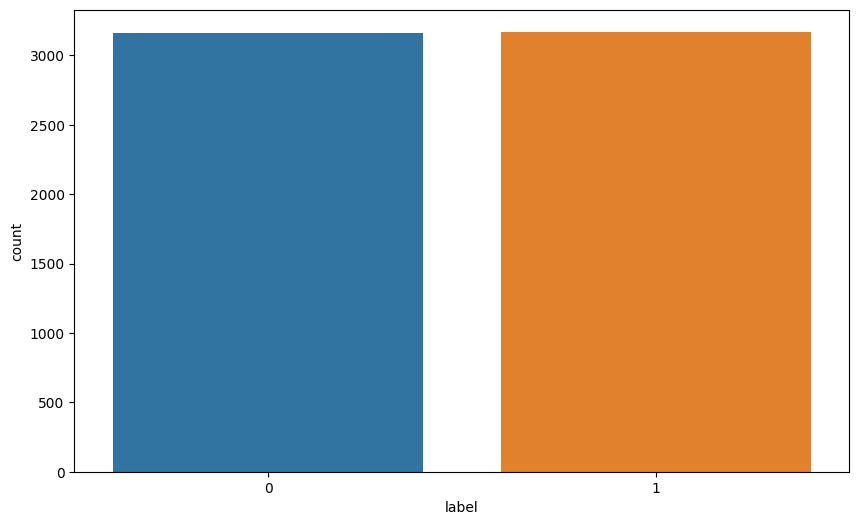

In [20]:
# Plotting Dataset
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data = all_news, x='label')
plt.show()

In [21]:
# Converting the text feature from a float object to a string object
# all_news['title'] = str(all_news['title'])
print(isinstance(all_news['title'],(str,)))
print(all_news['title'])

False
0                            You Can Smell Hillary’s Fear
1       Watch The Exact Moment Paul Ryan Committed Pol...
2             Kerry to go to Paris in gesture of sympathy
3       Bernie supporters on Twitter erupt in anger ag...
4        The Battle of New York: Why This Primary Matters
                              ...                        
6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: title, Length: 6335, dtype: object


In [22]:
# Preprocessing dataset
nltk.download('wordnet')
wordnet=WordNetLemmatizer()
corpus = []

for i in range(0,len(all_news)):
  review = re.sub('[^a-zA-Z]', ' ', all_news['title'][i])
  review = review.lower()
  review = review.split()

  review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [23]:
print(corpus)

['smell hillary fear', 'watch exact moment paul ryan committed political suicide trump rally video', 'kerry go paris gesture sympathy', 'bernie supporter twitter erupt anger dnc tried warn', 'battle new york primary matter', 'tehran usa', 'girl horrified watch boyfriend left facetime', 'britain schindler dy', 'fact check trump clinton commander chief forum', 'iran reportedly make new push uranium concession nuclear talk', 'three clinton iowa glimpse fire eluded hillary clinton campaign', 'donald trump shockingly weak delegate game somehow got even worse', 'strong solar storm tech risk today news oct video', 'way america preparing world war', 'trump take cruz lightly', 'woman lead differently', 'shocking michele obama hillary caught glamorizing date rape promoter', 'hillary clinton huge trouble america noticed sick thing hidden picture liberty writer news', 'iran bill obama like', 'chart explains everything need know partisanship america', 'slippery slope trump proposed ban muslim', 'ep

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(corpus)

CountVectorizer()

In [25]:
print(cv.vocabulary_)

{'smell': 7066, 'hillary': 3568, 'fear': 2860, 'watch': 8331, 'exact': 2682, 'moment': 4914, 'paul': 5543, 'ryan': 6616, 'committed': 1481, 'political': 5746, 'suicide': 7436, 'trump': 7905, 'rally': 6123, 'video': 8207, 'kerry': 4206, 'go': 3283, 'paris': 5499, 'gesture': 3237, 'sympathy': 7540, 'bernie': 716, 'supporter': 7463, 'twitter': 7957, 'erupt': 2615, 'anger': 284, 'dnc': 2256, 'tried': 7878, 'warn': 8313, 'battle': 641, 'new': 5141, 'york': 8540, 'primary': 5890, 'matter': 4713, 'tehran': 7621, 'usa': 8121, 'girl': 3253, 'horrified': 3646, 'boyfriend': 907, 'left': 4385, 'facetime': 2783, 'britain': 967, 'schindler': 6707, 'dy': 2394, 'fact': 2787, 'check': 1272, 'clinton': 1384, 'commander': 1468, 'chief': 1295, 'forum': 3070, 'iran': 4007, 'reportedly': 6365, 'make': 4602, 'push': 6046, 'uranium': 8112, 'concession': 1524, 'nuclear': 5220, 'talk': 7572, 'three': 7701, 'iowa': 4002, 'glimpse': 3267, 'fire': 2951, 'eluded': 2493, 'campaign': 1093, 'donald': 2281, 'shockingly

In [26]:
example = corpus[10]
example

'three clinton iowa glimpse fire eluded hillary clinton campaign'

In [27]:
example = cv.transform([example])
print(example.toarray())

[[0 0 0 ... 0 0 0]]


In [28]:
#Preparing train and test sets
x = corpus
y = all_news['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 0)

In [29]:
# Convert raw data into matrix using TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorization = CountVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [30]:
print(xv_train)

  (0, 2998)	1
  (0, 5659)	1
  (0, 1557)	1
  (0, 682)	1
  (0, 2518)	1
  (0, 3939)	1
  (0, 3622)	1
  (0, 6861)	1
  (1, 604)	1
  (1, 1125)	1
  (1, 3827)	1
  (1, 4848)	1
  (1, 933)	1
  (1, 2962)	1
  (1, 4667)	1
  (1, 6000)	1
  (1, 1870)	1
  (2, 1125)	1
  (2, 2962)	1
  (2, 1520)	1
  (2, 32)	1
  (2, 4719)	1
  (2, 4993)	1
  (2, 4390)	1
  (2, 881)	1
  :	:
  (4430, 2493)	1
  (4430, 4823)	1
  (4430, 1570)	1
  (4430, 2032)	1
  (4430, 5109)	1
  (4430, 10)	1
  (4430, 3962)	1
  (4431, 6609)	1
  (4431, 7088)	1
  (4431, 5359)	1
  (4431, 6860)	1
  (4431, 873)	1
  (4431, 4996)	1
  (4431, 3952)	1
  (4432, 2996)	1
  (4432, 4543)	1
  (4432, 321)	1
  (4432, 490)	1
  (4432, 4388)	1
  (4432, 5148)	1
  (4433, 575)	1
  (4433, 5558)	1
  (4433, 4795)	1
  (4433, 3178)	1
  (4433, 527)	1


In [31]:
print(y_train)

5642    1
5786    1
2030    0
285     0
6266    0
       ..
4931    1
3264    1
1653    0
2607    0
2732    1
Name: label, Length: 4434, dtype: object


In [32]:
print(xv_test)

  (0, 1565)	1
  (0, 2465)	1
  (0, 4889)	1
  (1, 575)	1
  (1, 1413)	1
  (1, 3963)	1
  (1, 4789)	1
  (1, 5558)	1
  (1, 5584)	1
  (1, 6609)	1
  (2, 32)	1
  (2, 339)	1
  (2, 1520)	1
  (2, 4030)	1
  (2, 4312)	1
  (2, 4625)	1
  (2, 4719)	1
  (2, 4783)	1
  (2, 4993)	1
  (3, 535)	1
  (3, 1277)	1
  (3, 2962)	1
  (3, 4888)	1
  (4, 337)	1
  (4, 2002)	1
  :	:
  (1898, 1549)	1
  (1898, 2083)	1
  (1898, 2100)	1
  (1898, 2208)	1
  (1898, 2523)	1
  (1898, 3019)	1
  (1898, 3290)	1
  (1898, 3697)	1
  (1898, 4241)	1
  (1899, 392)	1
  (1899, 1125)	1
  (1899, 2321)	1
  (1899, 2336)	1
  (1899, 2694)	1
  (1899, 2962)	1
  (1899, 5166)	1
  (1899, 5303)	1
  (1899, 6141)	1
  (1900, 998)	1
  (1900, 1120)	1
  (1900, 3623)	1
  (1900, 3951)	1
  (1900, 4280)	1
  (1900, 4370)	1
  (1900, 4734)	1


In [33]:
# Naive Bayes
# fit the training dataset on the NB classifier
from sklearn.naive_bayes import MultinomialNB
import pickle
Naive = MultinomialNB()
Naive.fit(xv_train, y_train)
# predict the labels on validation dataset
predictions_NB = Naive.predict(xv_test)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test))
print(classification_report(y_test, predictions_NB))

Naive Bayes Accuracy Score ->  0.8137822198842715
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       933
           1       0.79      0.87      0.83       968

    accuracy                           0.81      1901
   macro avg       0.82      0.81      0.81      1901
weighted avg       0.82      0.81      0.81      1901



Confusion matrix, without normalization


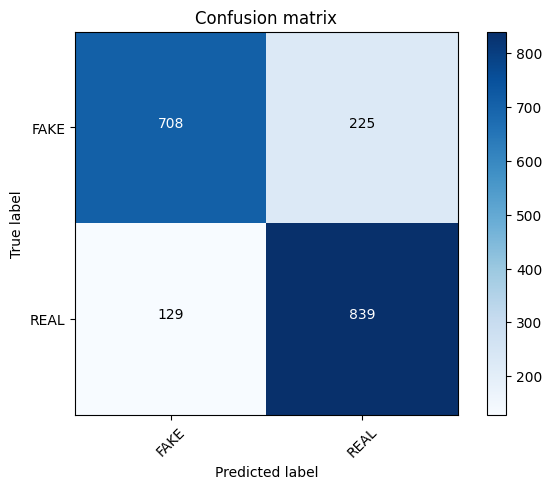

In [34]:
# Plotting the confusion matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text (j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
cm = metrics.confusion_matrix(y_test, predictions_NB)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [35]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear', random_state = 0)
SVM.fit(xv_train, y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(xv_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test))
print(classification_report(y_test, predictions_SVM))


SVM Accuracy Score ->  0.793792740662809
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       933
           1       0.79      0.81      0.80       968

    accuracy                           0.79      1901
   macro avg       0.79      0.79      0.79      1901
weighted avg       0.79      0.79      0.79      1901



Confusion matrix, without normalization


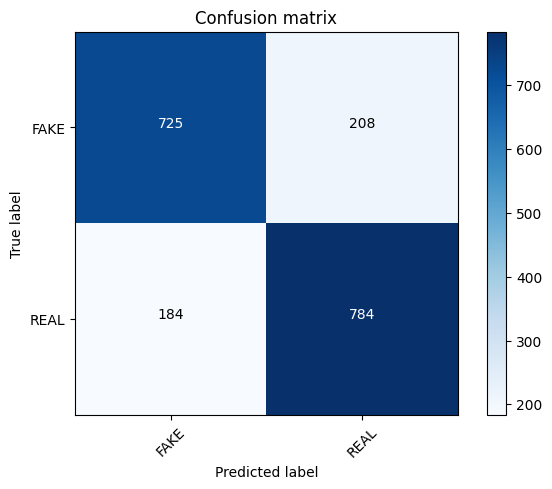

In [36]:
# Plotting the confusion matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text (j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
cm = metrics.confusion_matrix(y_test, predictions_SVM)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [37]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
#def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=1.0):
 #   model = LogisticRegression(C=_C).fit(X_tr, y_tr)
  #  score = model.score(X_test, y_test)
   # print('Test Score with', description, 'features', score)
    #return model

log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
model=log_reg.fit(xv_train, y_train)
predictions_Logreg = log_reg.predict(xv_test)
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_Logreg, y_test))
print(classification_report(y_test, predictions_Logreg))

[LibLinear]Logistic Regression Accuracy Score ->  0.8079957916885849
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       933
           1       0.81      0.82      0.81       968

    accuracy                           0.81      1901
   macro avg       0.81      0.81      0.81      1901
weighted avg       0.81      0.81      0.81      1901



Confusion matrix, without normalization


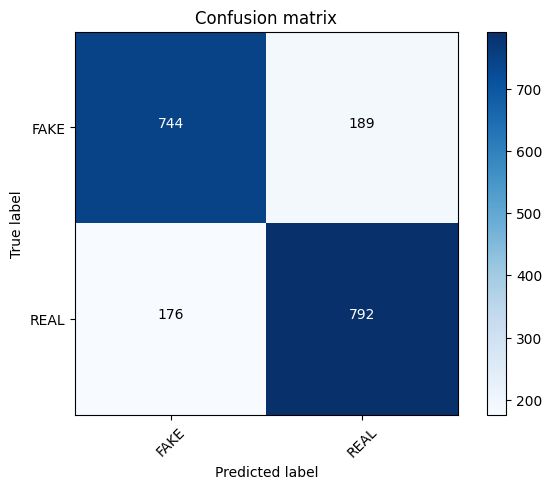

In [38]:
# Plotting the confusion matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text (j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
cm = metrics.confusion_matrix(y_test, predictions_Logreg)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Testing the model using NB classifier

In [39]:
def preprocess_text(news):
    review = re.sub('[^a-zA-Z]', ' ', news)
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    return review

In [40]:
def output_label(pred_prob):
    max_prob = max(pred_prob)
    if max_prob > 0.5:
        return "real news" if pred_prob[1] > pred_prob[0] else "fake news"
    else:
        return "fake news"

In [41]:
def manual_testing(news, vectorization, Naive):
    vectorization = CountVectorizer()
    xv_train = vectorization.fit_transform(x_train)
    Naive = MultinomialNB()
    Naive.fit(xv_train, y_train)
    testing_news = {"text":[news]}
    new_test = pd.DataFrame(testing_news)
    new_test["text"] = new_test["text"].apply(preprocess_text)
    new_x_test = new_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    predictions_NB = Naive.predict(new_xv_test)
    pred_prob = Naive.predict_proba(new_xv_test)[0]
    print("Prediction: {} (Probabilities: {})".format(output_label(pred_prob), pred_prob))
    print(new_x_test)
news = str(input())
manual_testing(news, vectorization, Naive)

A Fargo, North Dakota, man was arrested for clearing snow with a flamethrower
Prediction: fake news (Probabilities: [0.96042448 0.03957552])
0    fargo north dakota man arrested clearing snow ...
Name: text, dtype: object


Testing the model using SVM classifier

In [42]:
def preprocess_text(news):
    review = re.sub('[^a-zA-Z]', ' ', news)
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    return review

In [43]:
def output_label(pred_prob):
    max_prob = max(pred_prob)
    if max_prob > 0.5:
        return "real news" if pred_prob[1] > pred_prob[0] else "fake news"
    else:
        return "fake news"


In [44]:
from scipy.special import expit

def manual_testing(news, vectorization, SVM, new_xv_test):
    decision_scores = SVM.decision_function(new_xv_test)
    probabilities = expit(decision_scores)

    if probabilities > 0.5:
        print("Prediction: real news (Probability: {:.2f})".format(probabilities[0]))
    else:
        print("Prediction: fake news (Probability: {:.2f})".format(1 - probabilities[0]))

vectorization = CountVectorizer()
xv_train = vectorization.fit_transform(x_train)
SVM = SVC(kernel='linear', random_state=0)
SVM.fit(xv_train, y_train)

testing_news = {"text": [news]}
new_test = pd.DataFrame(testing_news)
new_test["text"] = new_test["text"].apply(preprocess_text)
new_x_test = new_test["text"]
new_xv_test = vectorization.transform(new_x_test)
news = str(input())
manual_testing(news, vectorization, SVM, new_xv_test)
print(new_x_test)

A Fargo, North Dakota, man was arrested for clearing snow with a flamethrower
Prediction: fake news (Probability: 0.79)
0    fargo north dakota man arrested clearing snow ...
Name: text, dtype: object


Testing the model using LR classifier

In [45]:
def preprocess_text(news):
    review = re.sub('[^a-zA-Z]', ' ', news)
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    return review

In [46]:
def output_label(pred_prob):
    max_prob = max(pred_prob)
    if max_prob > 0.5:
        return "real news" if pred_prob[1] > pred_prob[0] else "fake news"
    else:
        return "fake news"

In [47]:
def manual_testing(news, vectorization, LR):
    vectorization = CountVectorizer()
    xv_train = vectorization.fit_transform(x_train)
    LR = LogisticRegression()
    LR.fit(xv_train, y_train)
    testing_news = {"text":[news]}
    new_test = pd.DataFrame(testing_news)
    new_test["text"] = new_test["text"].apply(preprocess_text)
    new_x_test = new_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    predictions_LR = LR.predict(new_xv_test)
    pred_prob = LR.predict_proba(new_xv_test)[0]
    print("Prediction: {} (Probabilities: {})".format(output_label(pred_prob), pred_prob))
    print(new_x_test)

news = str(input())
manual_testing(news, vectorization, LR)

A Fargo, North Dakota, man was arrested for clearing snow with a flamethrower
Prediction: fake news (Probabilities: [0.92154223 0.07845777])
0    fargo north dakota man arrested clearing snow ...
Name: text, dtype: object
